In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
df = pd.read_csv(r'C:\Users\googi\Desktop\CIS 9760 Big Data Technology\project03\Athena\results.csv')

In [4]:
df.head()

,high,low,volatility,ts,name
0,279.23,278.63,0.60,2022-11-04 13:25:00-04:00,HD
1,278.83,278.25,0.58,2022-11-04 13:30:00-04:00,HD
2,278.65,278.01,0.64,2022-11-04 13:35:00-04:00,HD
3,278.36,277.79,0.57,2022-11-04 13:40:00-04:00,HD
4,278.41,277.72,0.69,2022-11-04 13:45:00-04:00,HD


# 1) Graph the average volatility trend per company (A single Line Chart: Each line refers to a company) Which company is the most volatile?


In [3]:
average_df = df.groupby([pd.to_datetime(df['ts']).dt.date, 'name']).mean()['volatility'].to_frame()
average_df

volatility
ts         name            
2022-10-24 AMZN    0.426154
           BABA    0.507949
           BBY     0.238846
           COST    1.235000
           EBAY    0.106667
...                     ...
2022-11-04 HD      0.915128
           KR      0.120385
           SHOP    0.229615
           TGT     0.515641
           WMT     0.293718

[100 rows x 1 columns]

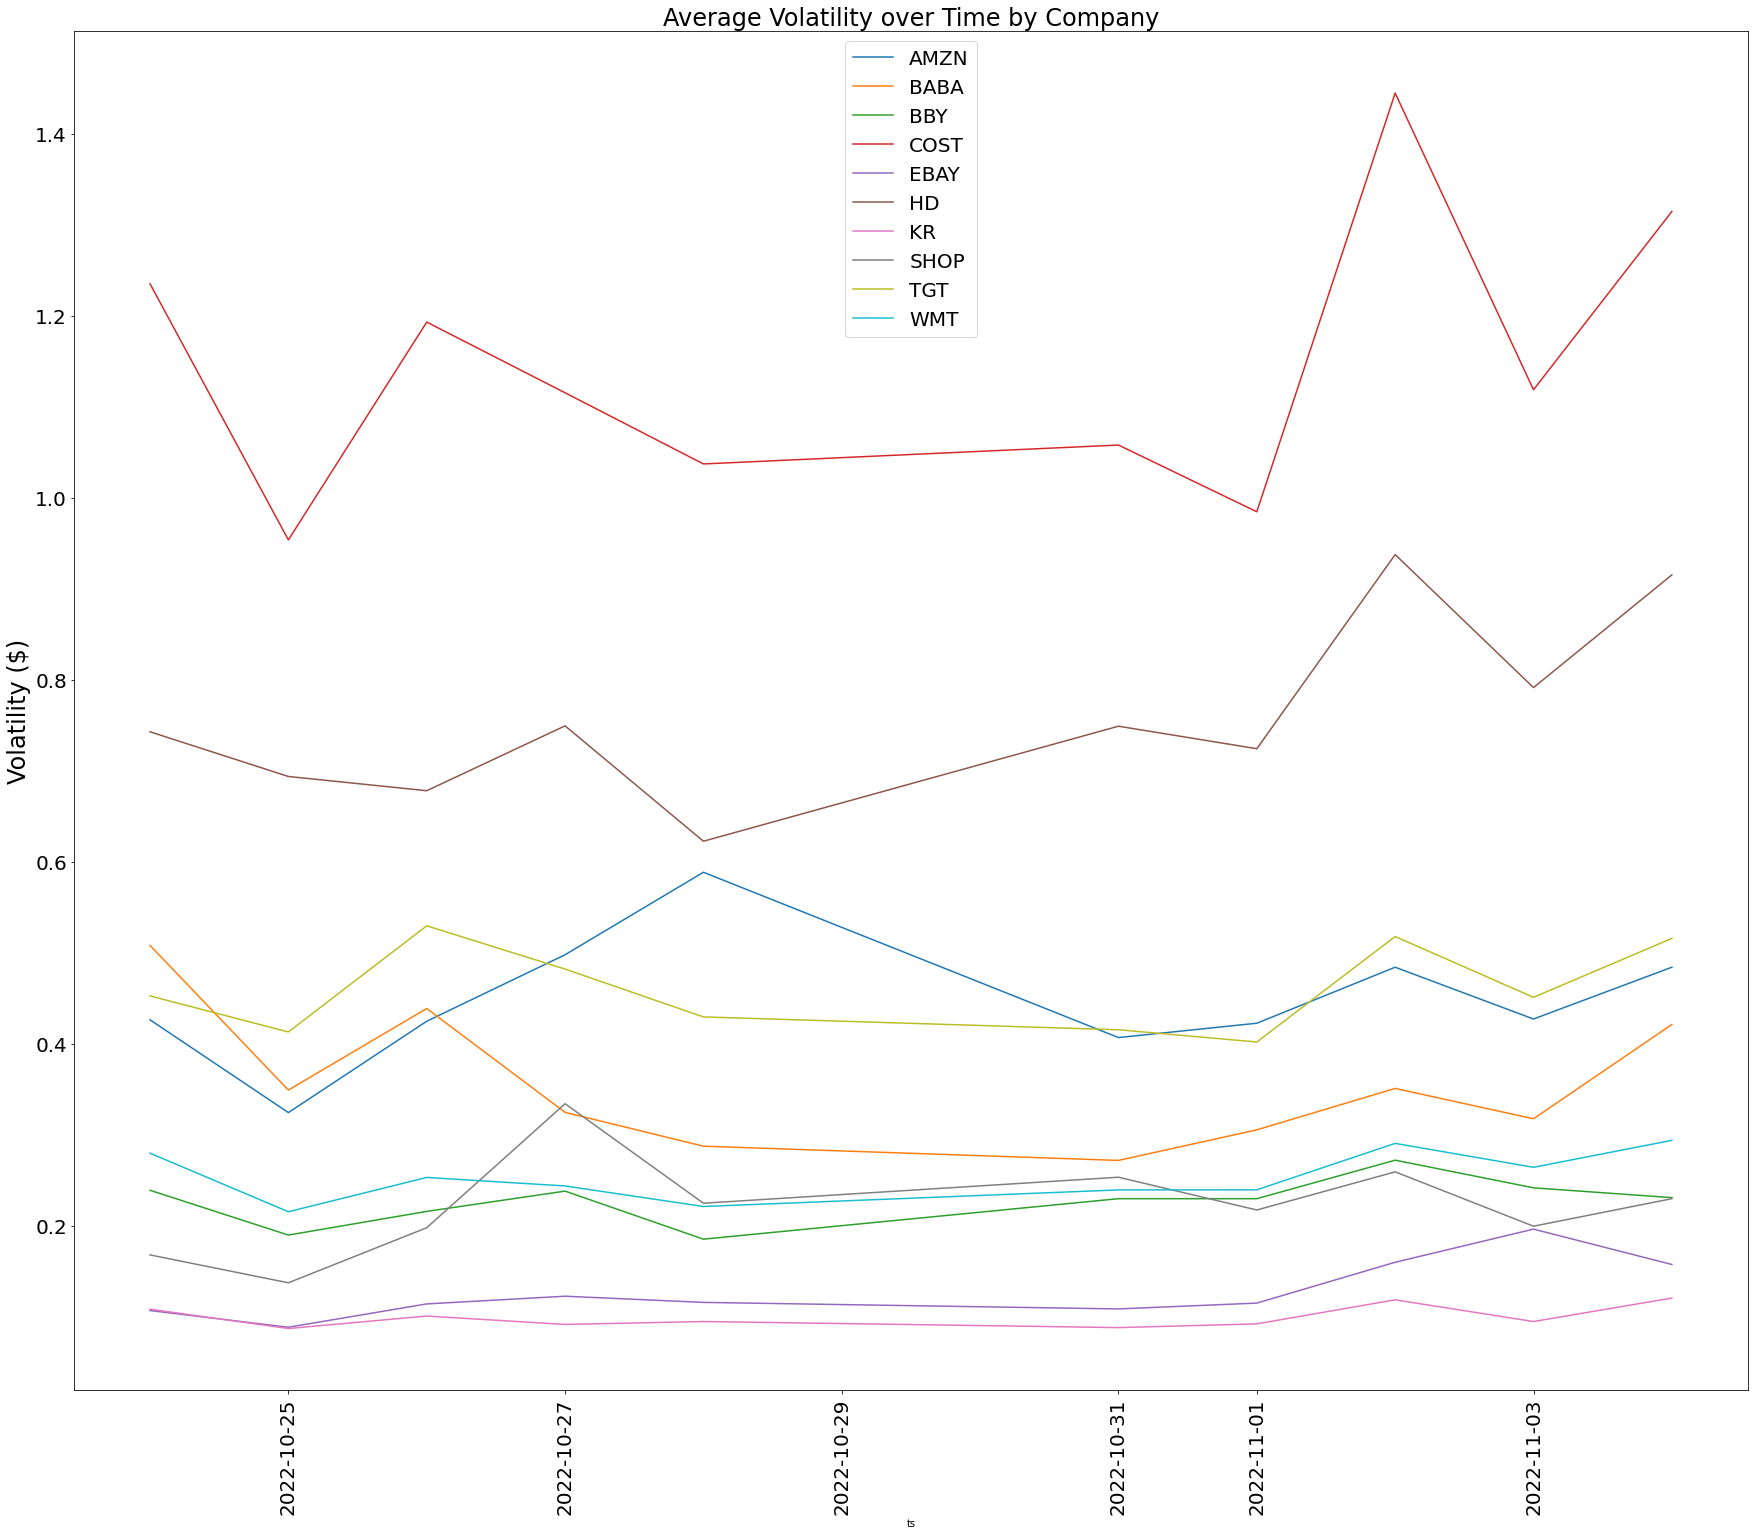

In [28]:
fig = plt.gcf()

fig.set_size_inches(30, 25)
sns.lineplot(data = average_df, x = 'ts', y = 'volatility', hue = 'name')
plt.title('Average Volatility over Time by Company', fontsize=24)
plt.xticks(fontsize = 20, rotation =  90)
plt.yticks(fontsize = 20)
plt.ylabel('Volatility ($)', fontsize=24)

plt.legend(fontsize = 20)
plt.show()

# 2) Graph the daily highest volatility per company (A Grouped Bar Chart: Each group refers to a company and the bars refer to the daily highest volatility) Do the findings from this graph support your conclusion from the first graph?


In [25]:
highest_df = df.groupby([pd.to_datetime(df['ts']).dt.date, 'name']).max()['volatility'].to_frame()
highest_df

volatility
ts         name            
2022-10-24 AMZN        1.39
           BABA        2.00
           BBY         1.11
           COST        5.76
           EBAY        0.46
...                     ...
2022-11-04 HD          2.38
           KR          0.35
           SHOP        1.03
           TGT         1.51
           WMT         0.81

[100 rows x 1 columns]

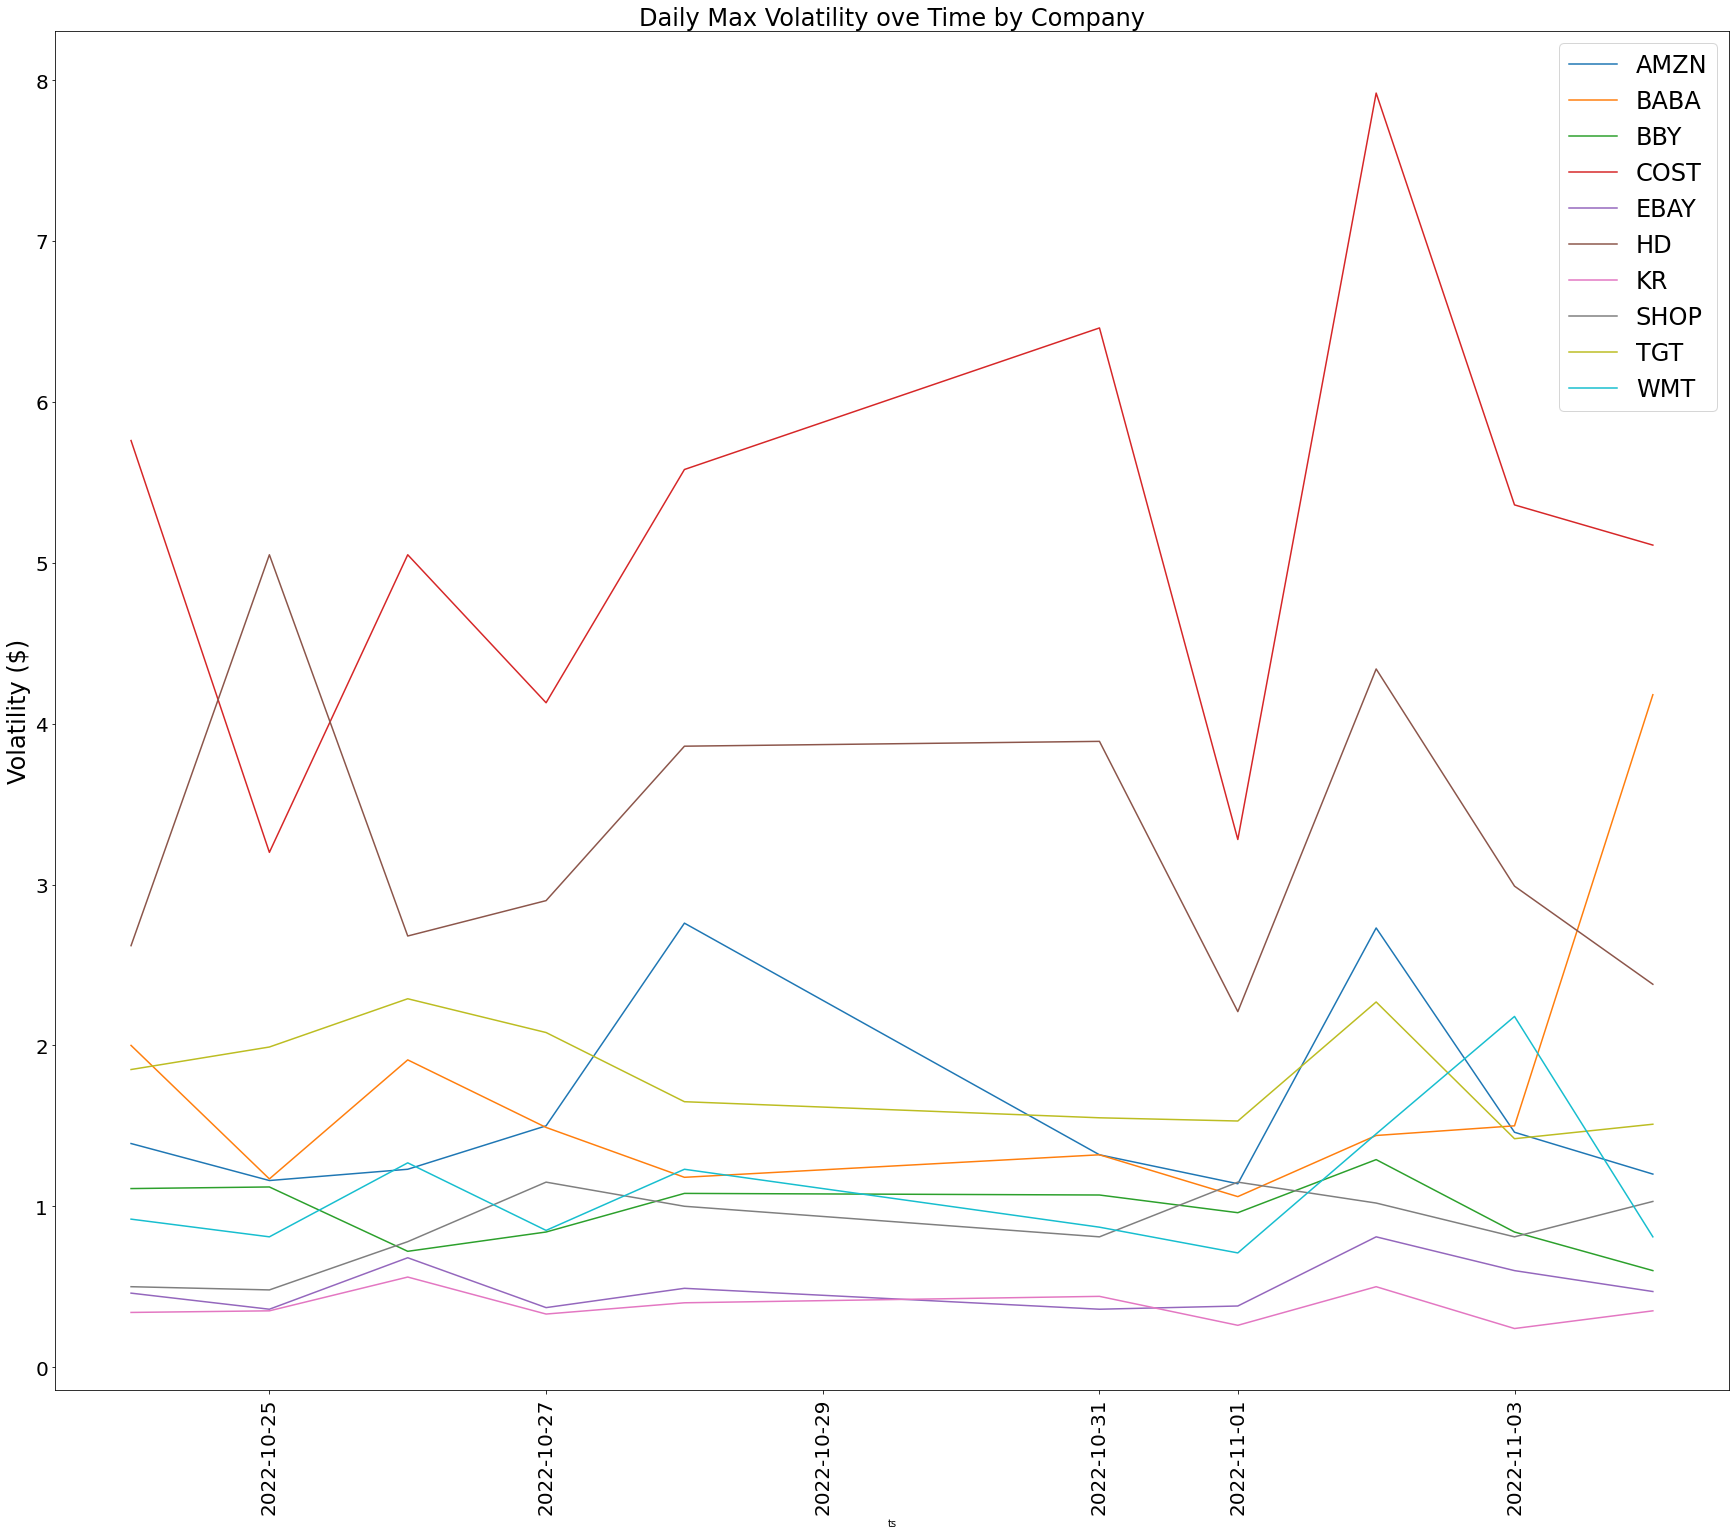

In [29]:
fig = plt.gcf()

fig.set_size_inches(30, 25)
sns.lineplot(data = highest_df, x = 'ts', y = 'volatility', hue = 'name')
plt.title('Daily Max Volatility ove Time by Company', fontsize=24)
plt.xticks(fontsize = 20, rotation = 90)
plt.yticks(fontsize = 20)
plt.ylabel('Volatility ($)', fontsize=24)

plt.legend(fontsize = 24)
plt.show()

# 3) Graph the normalized average volatility per company (A Bar Chart: Each bar refers to a company)
### Hint1: Normalized Average = (Average Volatility – Minimum Volatility) / (Maximum volatility – Minimum Volatility)
### Hint2: Calculate the average of Normalized Average per company
### Normalization allows the comparison of quantities or objects on an appropriate scale. In this case, which company is actually the most volatile?


In [67]:
df['norm_vol'] = df.groupby([pd.to_datetime(df['ts']).dt.date, 'name'])["volatility"].transform(lambda x: (x.mean()-x.min())/(x.max()-x.min())).to_frame()
df

,high,low,volatility,ts,name,norm_vol
0,279.23,278.63,0.60,2022-11-04 13:25:00-04:00,HD,0.263884
1,278.83,278.25,0.58,2022-11-04 13:30:00-04:00,HD,0.263884
2,278.65,278.01,0.64,2022-11-04 13:35:00-04:00,HD,0.263884
3,278.36,277.79,0.57,2022-11-04 13:40:00-04:00,HD,0.263884
4,278.41,277.72,0.69,2022-11-04 13:45:00-04:00,HD,0.263884
...,...,...,...,...,...,...
7795,142.56,142.24,0.32,2022-11-01 12:05:00-04:00,WMT,0.252951
7796,142.49,142.24,0.25,2022-11-01 12:10:00-04:00,WMT,0.252951
7797,142.41,142.27,0.14,2022-11-01 12:15:00-04:00,WMT,0.252951
7798,142.44,142.12,0.32,2022-11-01 12:20:00-04:00,WMT,0.252951


In [77]:
norm_df = df.groupby('name')["norm_vol"].mean().to_frame()
norm_df = norm_df.reset_index()
norm_df

,name,norm_vol
0,AMZN,0.225525
1,BABA,0.181273
2,BBY,0.187418
3,COST,0.174689
4,EBAY,0.215965
5,HD,0.182526
6,KR,0.215839
7,SHOP,0.202079
8,TGT,0.194615
9,WMT,0.188314


<Figure size 2160x1800 with 0 Axes>

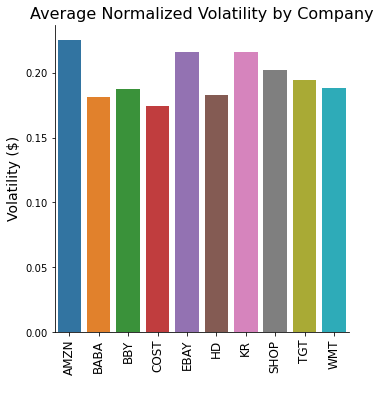

In [79]:
fig = plt.gcf()

sns.catplot(data = norm_df, x = 'name', y = 'norm_vol', kind = 'bar')
fig.set_size_inches(30, 25)
plt.title('Average Normalized Volatility by Company', fontsize=16)
plt.xticks(fontsize = 12, rotation = 90)
plt.yticks(fontsize = 10)
plt.ylabel('Volatility ($)', fontsize=14)
plt.xlabel(" ")
plt.show()

# 4) Graph the normalized average volatility on October 24th, 2022 (or Any Date) (A Bar Chart: Each bar refers to a company) Which company is the most volatile on a given day?


In [64]:
day_df = df.groupby([pd.to_datetime(df['ts']).dt.date, 'name']).mean()['norm_vol'].to_frame()
day_df = day_df.reset_index()
day_df = day_df[day_df.ts.astype(str)=='2022-10-24']
day_df

,ts,name,norm_vol
0,2022-10-24,AMZN,0.235043
1,2022-10-24,BABA,0.197822
2,2022-10-24,BBY,0.162352
3,2022-10-24,COST,0.169725
4,2022-10-24,EBAY,0.196970
5,2022-10-24,HD,0.230612
6,2022-10-24,KR,0.275641
7,2022-10-24,SHOP,0.261823
8,2022-10-24,TGT,0.187463
9,2022-10-24,WMT,0.219043


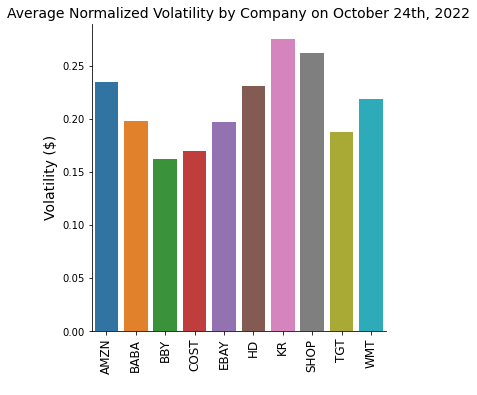

In [73]:
sns.catplot(data = day_df, x = 'name', y = 'norm_vol', kind = 'bar')
plt.title('Average Normalized Volatility by Company on October 24th, 2022', fontsize=14)
plt.xticks(fontsize = 12, rotation = 90)
plt.yticks(fontsize = 10)
plt.ylabel('Volatility ($)', fontsize=14)
plt.xlabel(" ")
plt.show()